In [1]:
import yaml
import pandas as pd
parsed_data_dir = 'C:\\Code\\Classes\\csci401\\plot_success'
dir = parsed_data_dir + '\\401' 


In [2]:
import os
folders = [f for f in os.listdir(dir)]
print(folders)

['Boston_0_256_020_ECBS', 'Boston_0_256_020_ECBSP', 'den312d_040_ECBS', 'den312d_040_ECBSP', 'empty-32-32_015_ECBS', 'empty-32-32_015_ECBSP', 'maze-32-32-2_015_ECBS', 'maze-32-32-2_015_ECBSP', 'orz900d_020_ECBS', 'orz900d_020_ECBSP', 'random-32-32-10_015_ECBS', 'random-32-32-10_015_ECBSP', 'room-64-64-8_050_ECBS', 'room-64-64-8_050_ECBSP', 'warehouse-10-20-10-2-1_080_ECBS', 'warehouse-10-20-10-2-1_080_ECBSP']


In [3]:
maps = set()
for folder in folders:
    maps.add("_".join(folder.split("_")[:-1]))
print(maps)

{'warehouse-10-20-10-2-1_080', 'den312d_040', 'Boston_0_256_020', 'random-32-32-10_015', 'orz900d_020', 'room-64-64-8_050', 'empty-32-32_015', 'maze-32-32-2_015'}


In [4]:
# map, algorithm, weight, agents, test#, success, time, cost, total_low_level_nodes
algorithms = ["ECBS", "ECBSP"]

In [5]:
for map in maps:
    data_points = [] 

    for algorithm in algorithms:
        folder = f"{map}_{algorithm}"
        weight_folders = [f for f in os.listdir(f"{dir}\\{folder}")]
        for weight_folder_name in weight_folders:
            weight = weight_folder_name.split("=")[-1]
            weight = float(weight)
            weight_folder_path = f"{dir}\\{folder}\\{weight_folder_name}"
            while True:
                subfolders = [f for f in os.listdir(weight_folder_path) if os.path.isdir(os.path.join(weight_folder_path, f))]
                if not subfolders:
                    break
                weight_folder_path = os.path.join(weight_folder_path, subfolders[0])
            data_folder = weight_folder_path
            for data_file in os.listdir(data_folder):
                if data_file.endswith(".yaml"):
                    file_path = os.path.join(data_folder, data_file)
                    with open(file_path, 'r') as stream:
                        try:
                            file_name = os.path.basename(file_path)[:-(len(".yaml"))]
                            agents = file_name.split("_")[-3]
                            test_num = file_name.split("_")[-1]
                            stream.readline()
                            cost = int(stream.readline().split(" ")[-1])
                            stream.readline()
                            stream.readline()
                            stream.readline()
                            runtime = float(stream.readline().split(" ")[-1])
                            stream.readline()
                            nodes = int(stream.readline().split(" ")[-1])   

                            data_points.append([map, algorithm, weight, int(agents), int(test_num), runtime, cost, nodes])
                        except yaml.YAMLError as exc:
                            print(exc)
    results_df = pd.DataFrame(data_points, columns=["map", "algorithm", "weight", "agents", "test", "time", "cost", "total_lowlevel_node"])
    results_df.to_csv(f"results_{map}.csv", index=False)

    


In [6]:
import glob



# Get a list of all CSV files in the parsed_data folder
csv_files = glob.glob(os.path.join(parsed_data_dir, "parsed_data", '*.csv'))
print(csv_files)
# Read each CSV file and append it to a list
dataframes = [pd.read_csv(f) for f in csv_files]

# Concatenate all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv(os.path.join(parsed_data_dir, 'combined_results.csv'), index=False)

['C:\\Code\\Classes\\csci401\\plot_success\\parsed_data\\results_Boston_0_256_020.csv', 'C:\\Code\\Classes\\csci401\\plot_success\\parsed_data\\results_den312d_040.csv', 'C:\\Code\\Classes\\csci401\\plot_success\\parsed_data\\results_empty-32-32_015.csv', 'C:\\Code\\Classes\\csci401\\plot_success\\parsed_data\\results_maze-32-32-2_015.csv', 'C:\\Code\\Classes\\csci401\\plot_success\\parsed_data\\results_orz900d_020.csv', 'C:\\Code\\Classes\\csci401\\plot_success\\parsed_data\\results_random-32-32-10_015.csv', 'C:\\Code\\Classes\\csci401\\plot_success\\parsed_data\\results_room-64-64-8_050.csv', 'C:\\Code\\Classes\\csci401\\plot_success\\parsed_data\\results_warehouse-10-20-10-2-1_080.csv']


In [7]:
combined_df.sample(5)

,map,algorithm,weight,agents,test,time,cost,total_lowlevel_node
5448,random-32-32-10_015,ECBS,1.2,10,8,0.000413,159,2
7052,warehouse-10-20-10-2-1_080,ECBS,1.1,10,10,0.006307,709,2
3429,empty-32-32_015,ECBSP,1.2,40,6,1.721000,821,8191
3318,empty-32-32_015,ECBSP,1.1,20,9,0.064769,467,255
3433,maze-32-32-2_015,ECBS,1.0,10,0,0.155140,601,51


In [8]:
combined_df.shape[0]

7879

In [9]:
merged_df = combined_df.merge(combined_df, on=['map', 'agents', 'test', "weight"], suffixes=('_ECBS', '_ECBSP'))
filtered_df = merged_df[(merged_df['algorithm_ECBS'] == 'ECBS') & (merged_df['algorithm_ECBSP'] == 'ECBSP')]
print(filtered_df.shape[0])
filtered_df.sample(5)

1922


,map,algorithm_ECBS,weight,agents,test,time_ECBS,cost_ECBS,total_lowlevel_node_ECBS,algorithm_ECBSP,time_ECBSP,cost_ECBSP,total_lowlevel_node_ECBSP
6092,orz900d_020,ECBS,1.05,20,15,0.616515,20136,5,ECBSP,1.082460,20136,14
4436,empty-32-32_015,ECBS,1.10,30,14,0.009709,703,10,ECBSP,0.135402,720,1023
9381,room-64-64-8_050,ECBS,1.10,20,14,0.022196,1012,7,ECBSP,0.184525,1052,127
1123,Boston_0_256_020,ECBS,1.10,40,18,0.053427,8481,2,ECBSP,0.047715,8481,3
7045,orz900d_020,ECBS,1.20,30,3,1.681530,32812,8,ECBSP,9.020490,32814,27


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ecbs_vs_ecbsp_runtime(df,weight):
    df = df[df['weight'] == weight]
    df.plot(kind='scatter', x='time_ECBS', y='time_ECBSP', title=f'ECBS vs ECBSP runtime Comparison using weight={weight}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1e-2, 13)
    plt.ylim(1e-2, 13)

    # Calculate the line of best fit
    # Plot the line of best fit
    plt.plot([1e-2, 13], [1e-2, 13], color='red', linestyle='--')
    plt.show()

def plot_ecbs_vs_ecbsp_nodes(df,weight):
    df = df[df['weight'] == weight]
    df.plot(kind='scatter', x='total_lowlevel_node_ECBS', y='total_lowlevel_node_ECBSP', title=f'ECBS vs ECBSP nodes explored Comparison using weight={weight}')
    plt.xscale('log')
    plt.yscale('log')

    # Calculate the line of best fit
    # Plot the line of best fit
    plt.plot([0, min(max(df["total_lowlevel_node_ECBS"]), max(df["total_lowlevel_node_ECBSP"]))], [0, min(max(df["total_lowlevel_node_ECBS"]), max(df["total_lowlevel_node_ECBSP"]))], color='red', linestyle='--')
    plt.show()


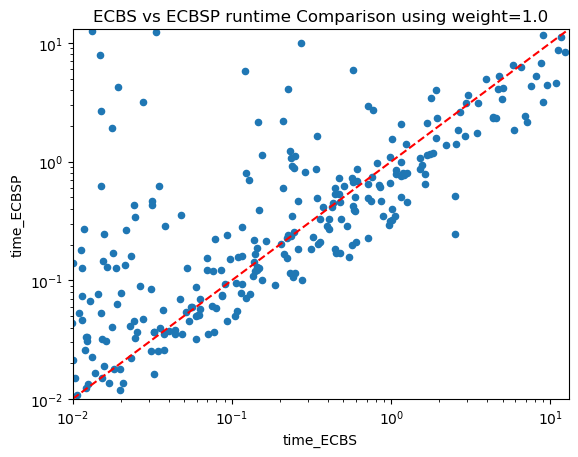

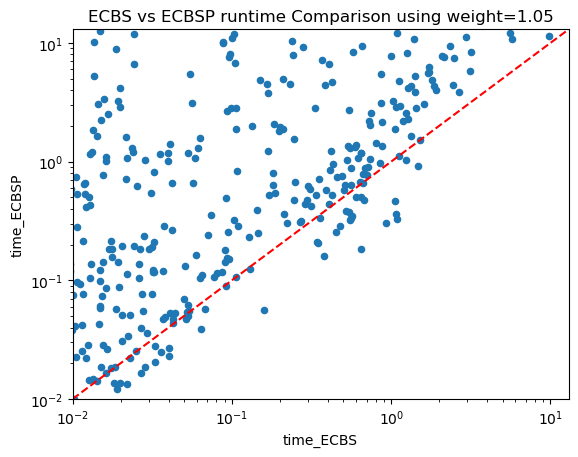

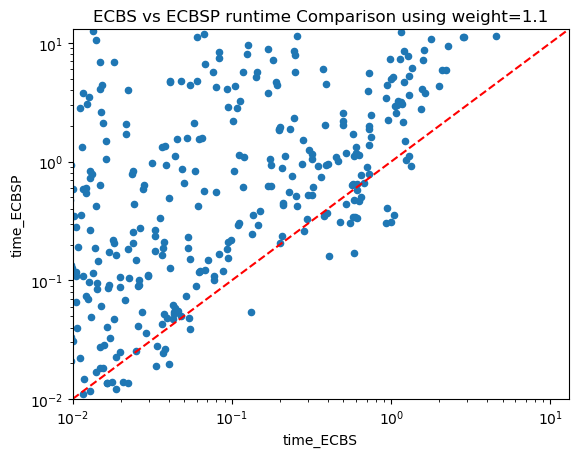

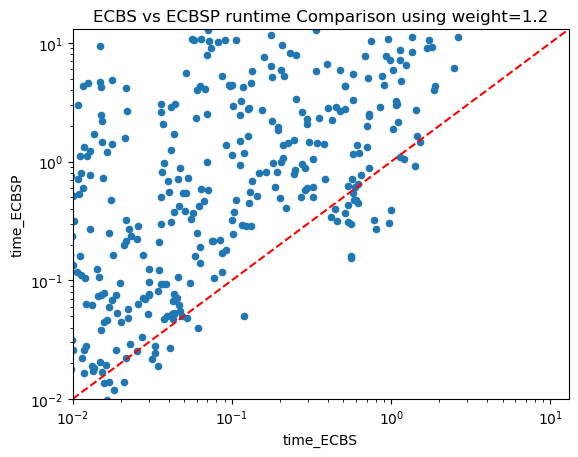

In [11]:
weights = [1.0, 1.05, 1.1, 1.2]
for weight in weights:
    plot_ecbs_vs_ecbsp_runtime(filtered_df, weight)


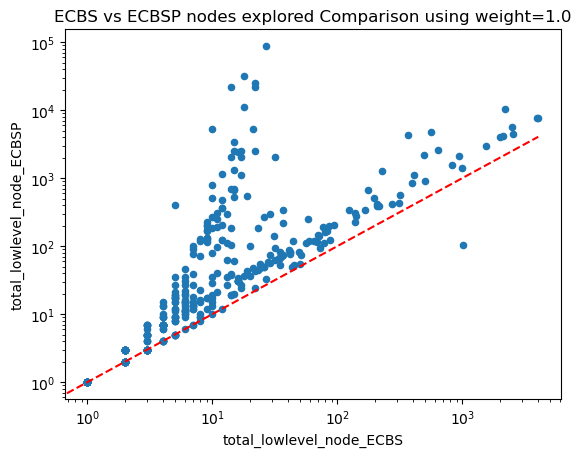

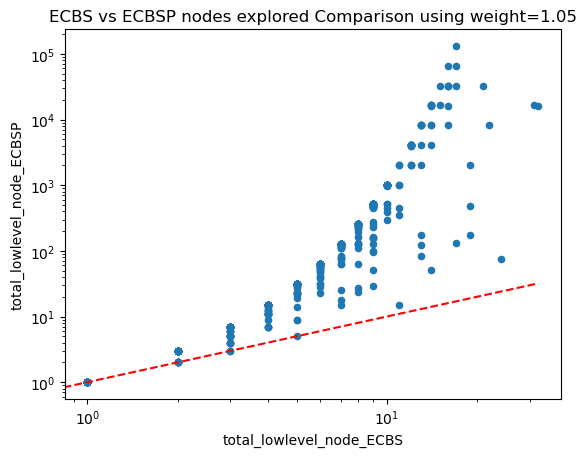

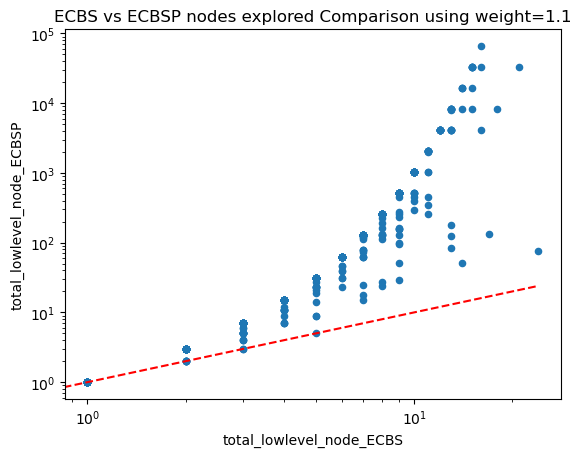

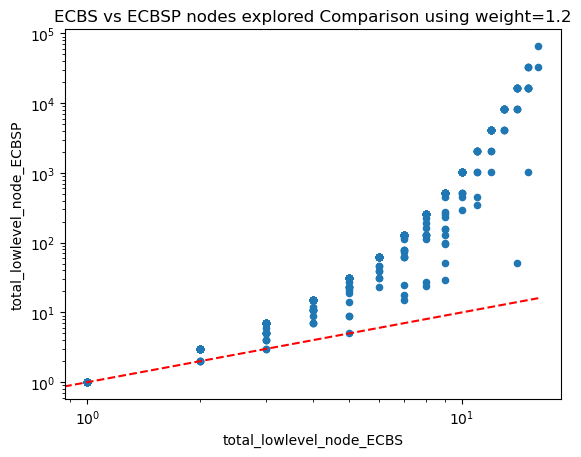

In [12]:
for weight in weights:
    plot_ecbs_vs_ecbsp_nodes(filtered_df, weight)

In [13]:
import matplotlib.pyplot as plt

# Filter the dataframe for weight = 1.0

# Plot the data
def plot_success_rate_vs_weight_for_map(df, map):
    map_df = df[df['map'] == map]
    grouped_df = map_df.groupby(['algorithm', 'weight',"map"]).count()

    grouped_df["success_rate"] = (grouped_df["test"]) / 300
    plt.figure(figsize=(10, 6))

 

    for algorithm in grouped_df.index.get_level_values('algorithm').unique():
        df = grouped_df.xs(algorithm, level='algorithm')
        plt.plot(df.index.get_level_values('weight'), df['success_rate'], marker='o', linestyle='-', label=f"{algorithm}")

    plt.xlabel('weight')
    plt.ylabel('Success Rate')
    plt.title(f'Success Rate vs weight for {map}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_success_rate_vs_agents_for_map(df, map):
    map_df = df[df['map'] == map]
    grouped_df = map_df.groupby(['algorithm', 'weight', 'agents', "map"]).count()
    grouped_df["success_rate"] = (grouped_df["test"]) / 20
    plt.figure(figsize=(10, 6))

    for weight in weights:

        filtered_grouped_df = grouped_df.xs(weight, level='weight')
        for algorithm in filtered_grouped_df.index.get_level_values('algorithm').unique():
            df = filtered_grouped_df.xs(algorithm, level='algorithm')
            plt.plot(df.index.get_level_values('agents'), df['success_rate'], marker='o', linestyle='-', label=f"{algorithm} w={weight}")

    plt.xlabel('Agents')
    plt.ylabel('Success Rate')
    plt.title(f'Success Rate vs Agents for {map}')
    plt.legend()
    plt.grid(True)
    plt.show()


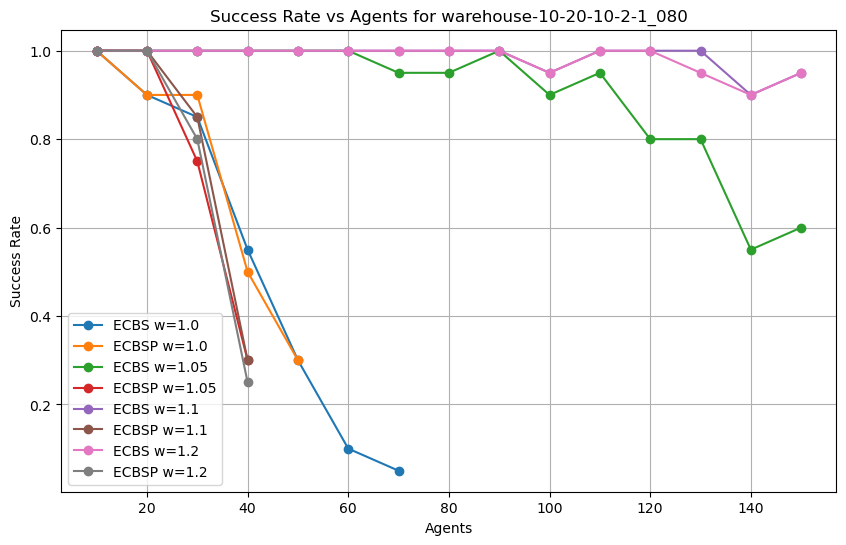

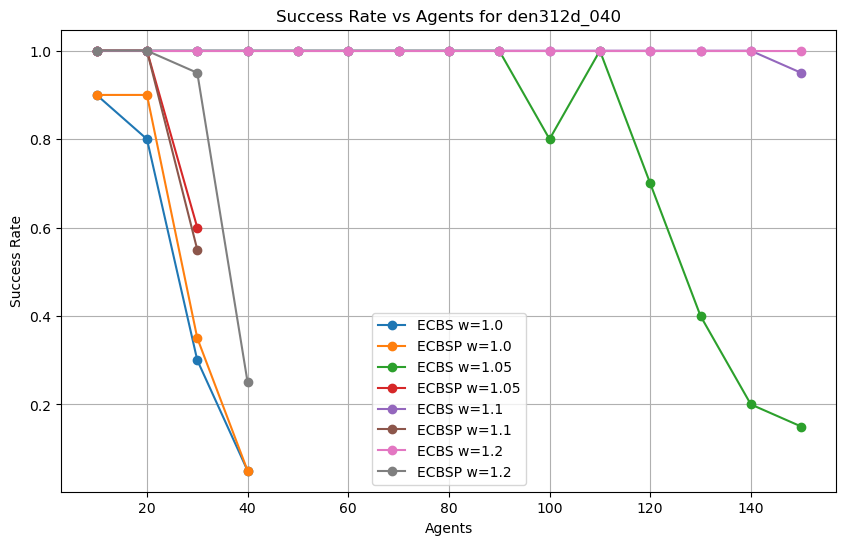

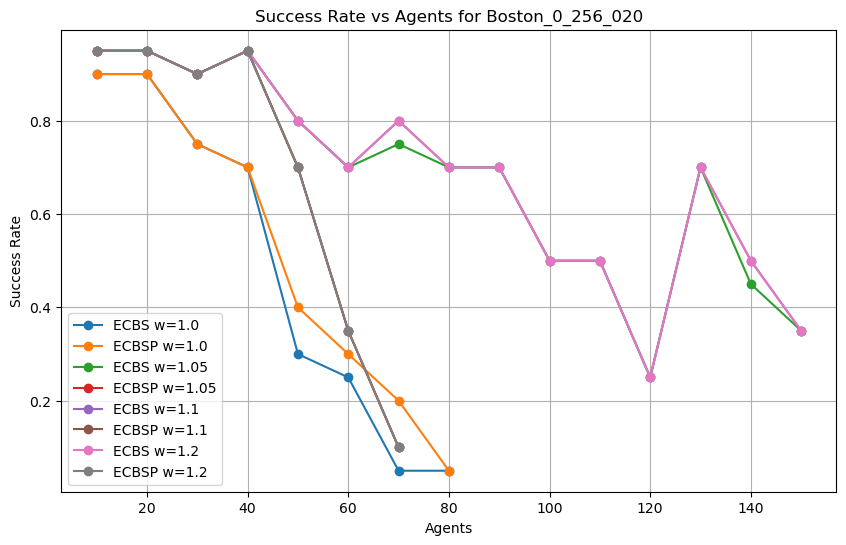

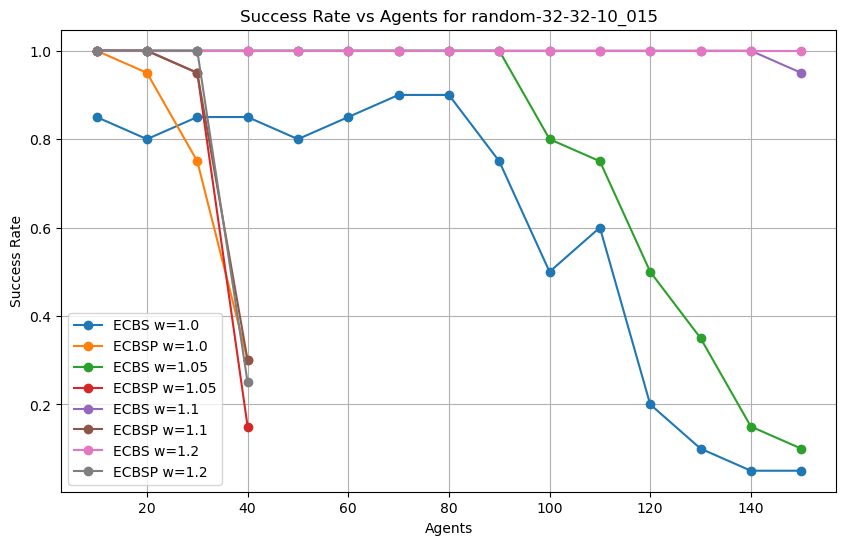

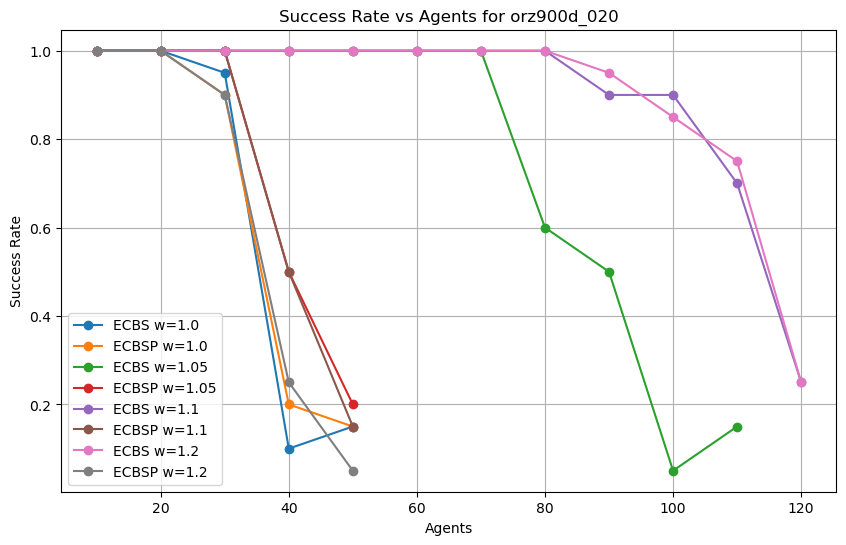

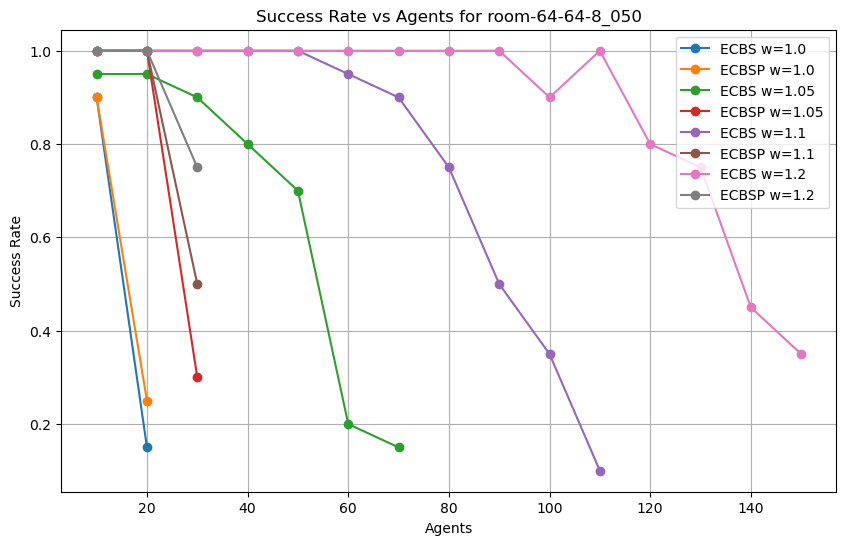

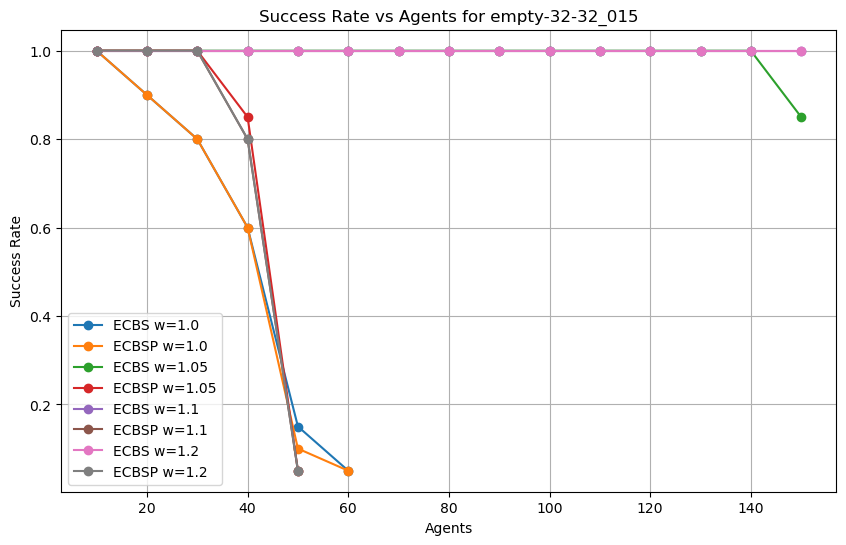

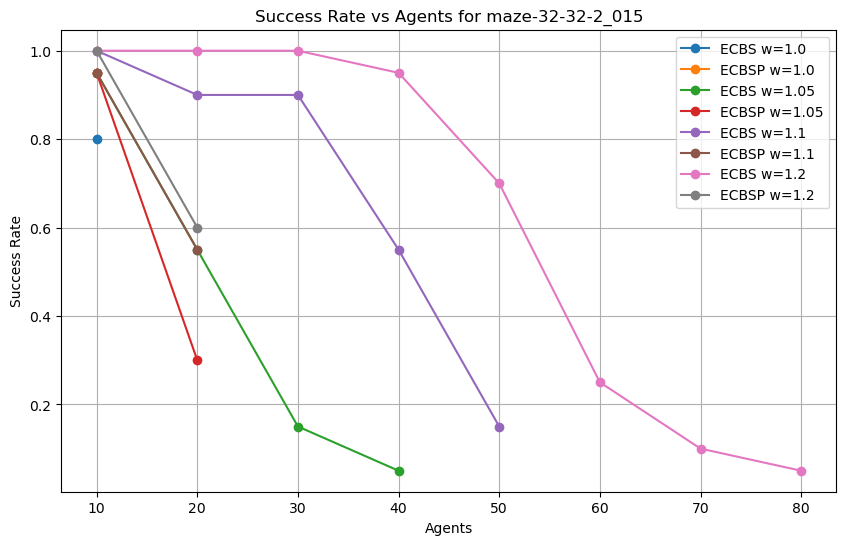

In [14]:
maps = set(combined_df['map'])
for map in maps:
    plot_success_rate_vs_agents_for_map(combined_df, map)

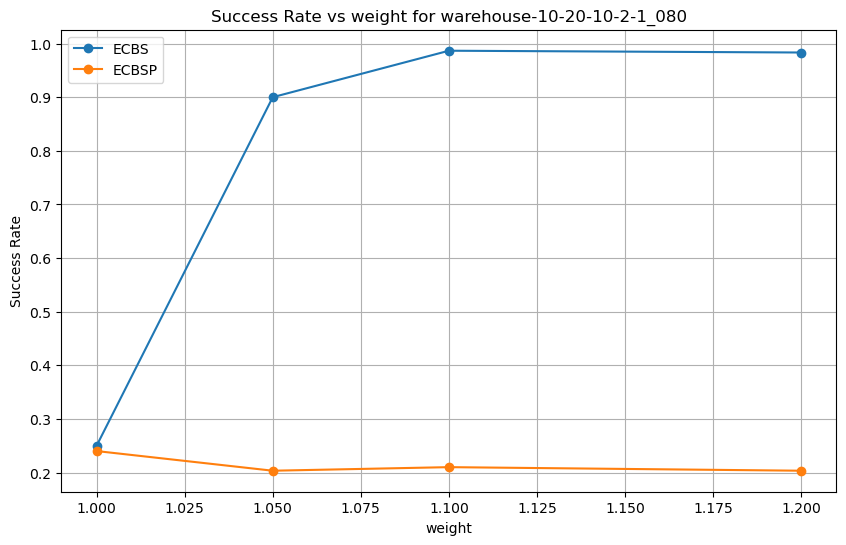

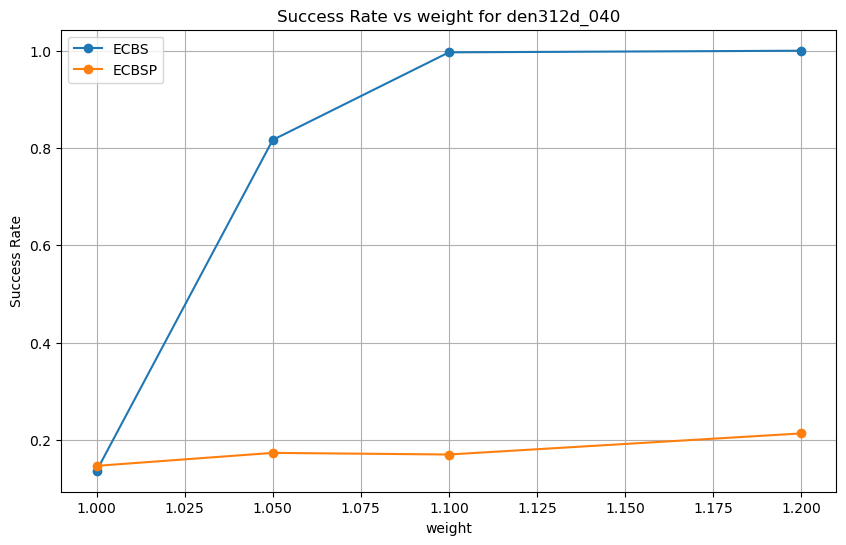

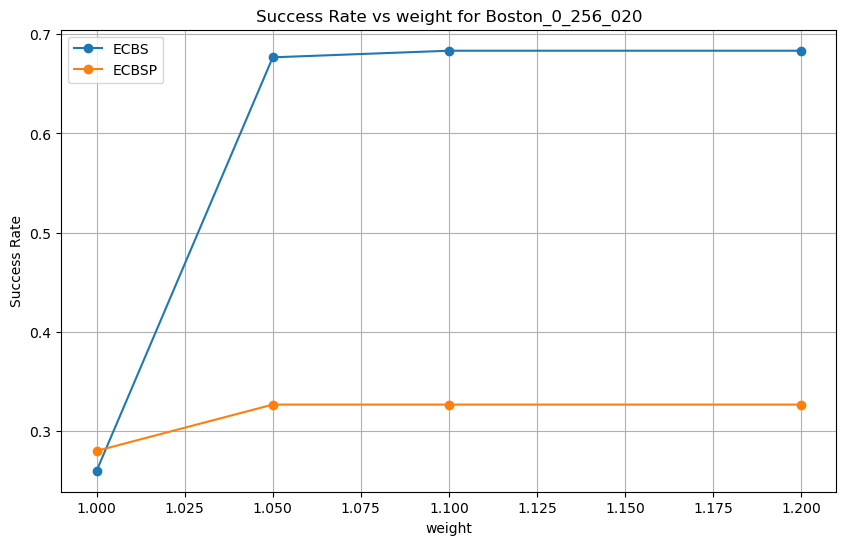

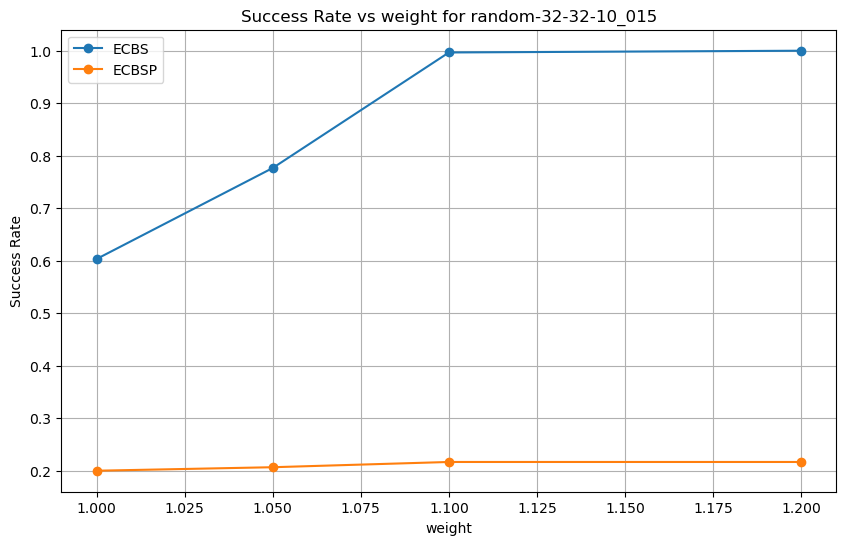

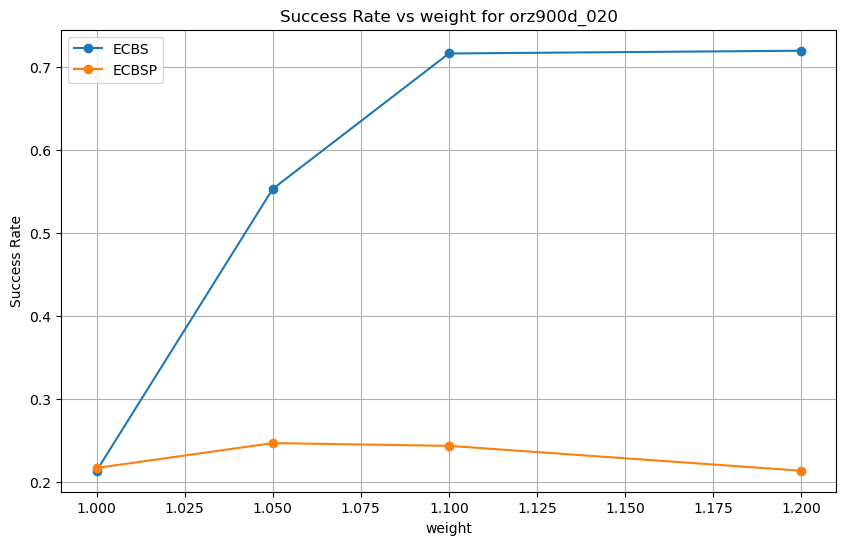

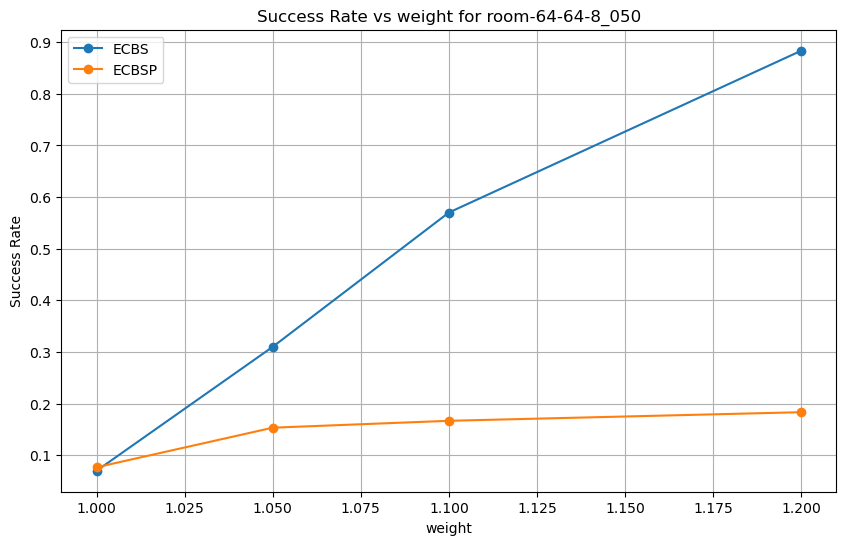

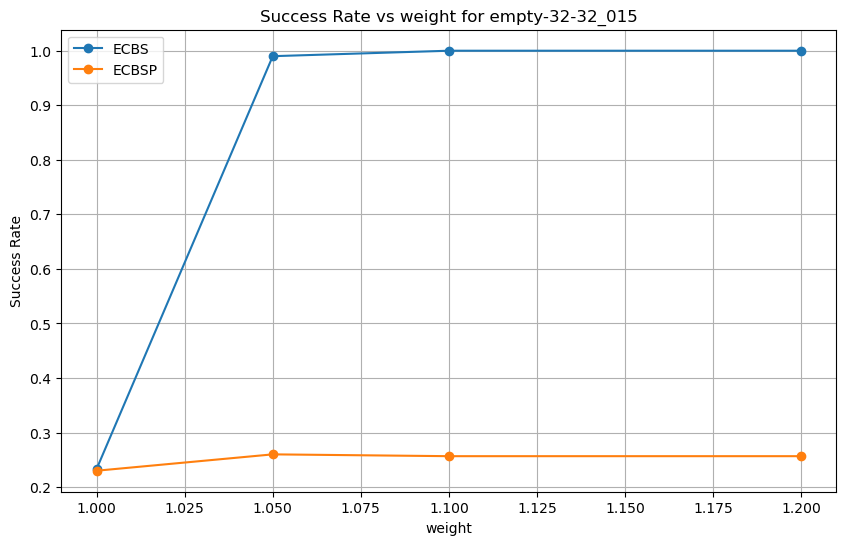

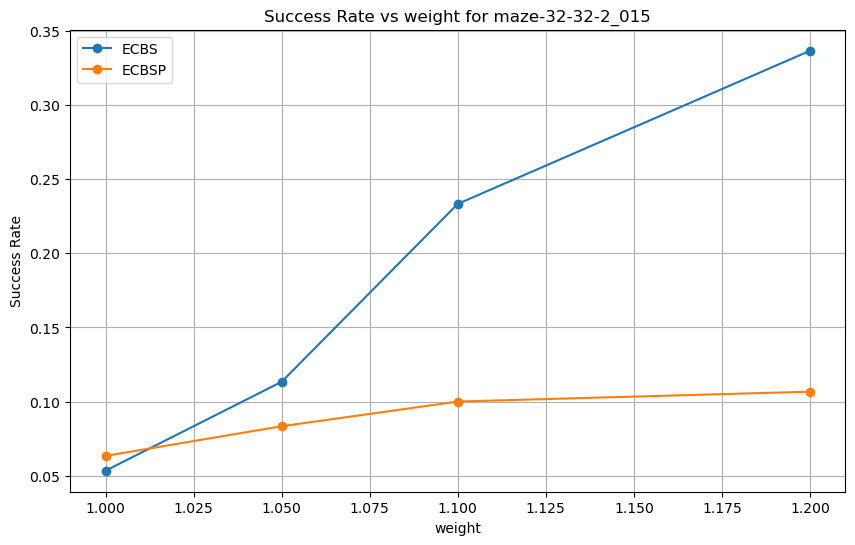

In [15]:
for map in maps:
    plot_success_rate_vs_weight_for_map(combined_df, map)